<a href="https://colab.research.google.com/github/silvi3110/sis-252-inteligencia-artificial/blob/main/OpenCV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Notebook 4: Detección de bordes y contornos
# Importamos  las librerías necesarias
import cv2 # Importamos OpenCV para procesamiento de imágenes
import numpy as np # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt # Importamos matplotlib para visualización
from google.colab.patches import cv2_imshow # Importamos función para mostrar imágenes en Colab

In [3]:
# Cargar una imágen de ejemplo
from urllib.request import urlopen  # Para abrir URLs
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imágenes en formato BGR, lo convertimos a RGB para visualización correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convertimos a escala de grises para la detección de bordes
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# 1. Detección de bordes con Canny
# El algoritmo de Canny detecta bordes en una imagen
# Aplicamos un filtro gaussiano para reducir el ruido (opcional)
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0) # (5,5) es el tamaño del kernel
# Aplicamos el detector de bordes Canny (umbral_minímo, umbral_máximo)
edges_canny = cv2.Canny(blurred, 50, 150) # Los umbrales determinan qué gradientes se consideran bordes

In [5]:
# 2. Detección de bordes con Sobel
# El operador Sobel calcula los gradientes de la imagen
# Gradiente en dirección X (detecta bordes verticales)
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3) # dx=1 , dy=0 para gradiente horizontal
# Gradiente en direccion Y (detecta bordes horizontales)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3) # dx=0 , dy=1 para gradiente vertical

In [6]:
# Convertimos los gradientes a valor absoluto y luego a uint8
sobelx = np.absolute(sobelx) # Valor absoluto para conseguir la magnitud
sobely = np.absolute(sobely) # Valor absoluto para conseguir la magnitud
sobelx = np.uint8(255 * sobelx / np.max(sobelx)) # Normalizamos y convertimos a uint8
sobely = np.uint8(255 * sobely / np.max(sobely)) # Normalizamos y convertimos a uint8

# Combianmos los gradientes para obtener la magnitud total
sobel_combined = cv2.bitwise_or(sobelx, sobely) # Combinamos los bordes horizontales y verticales

In [7]:
# 3. Deteeción de bordes con Laplaciano
# El operador Laplaciano detecta áreas de cambio rápido (bordes)
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F) # Calculamos el Laplaciano
laplacian = np.absolute(laplacian) # Valor absoluto para conseguir la magnitud
laplacian = np.uint8(255 * laplacian / np.max(laplacian)) # Normalizamos y convertimos a uint8

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [225, 138, 128],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[ 82,  21,  55],
        [ 81,  20,  54],
        [ 92,  28,  62],
        ...,
        [175,  71,  82],
        [175,  68,  78],
        [175,  65,  74]],

       [[ 80,  18,  55],
        [ 81,  19,  56],
        [ 96,  32,  66],
        ...,
        [177,  69,  82],
        [181,  71,  80],
        [183,  72,  81]],

       [[ 81,  19,  56],
        [ 83,  21,  58],
        [ 98,  34,  68],
        ...,
        [176,  68,  81],
        [183,  72,  81],
        [188,  74,  84]]], dtype=uint8)
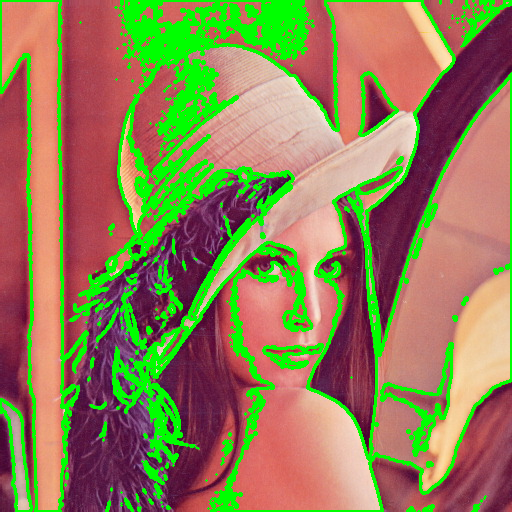

In [9]:
# 4. Detección de contornos
# Primero binarizamos la imagen usando un umbral simple
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY) # Aplicamos umbral para binarizar la imagen
# Encontramos los contornos en la imagen binarizada
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Creamos una copia de la imagen original para dibujar los contornos
contour_image = image_rgb.copy()
# Dibujamos todos los contornos encontrados (-1 para dibujar todos)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2) # Color verde, grosor 2

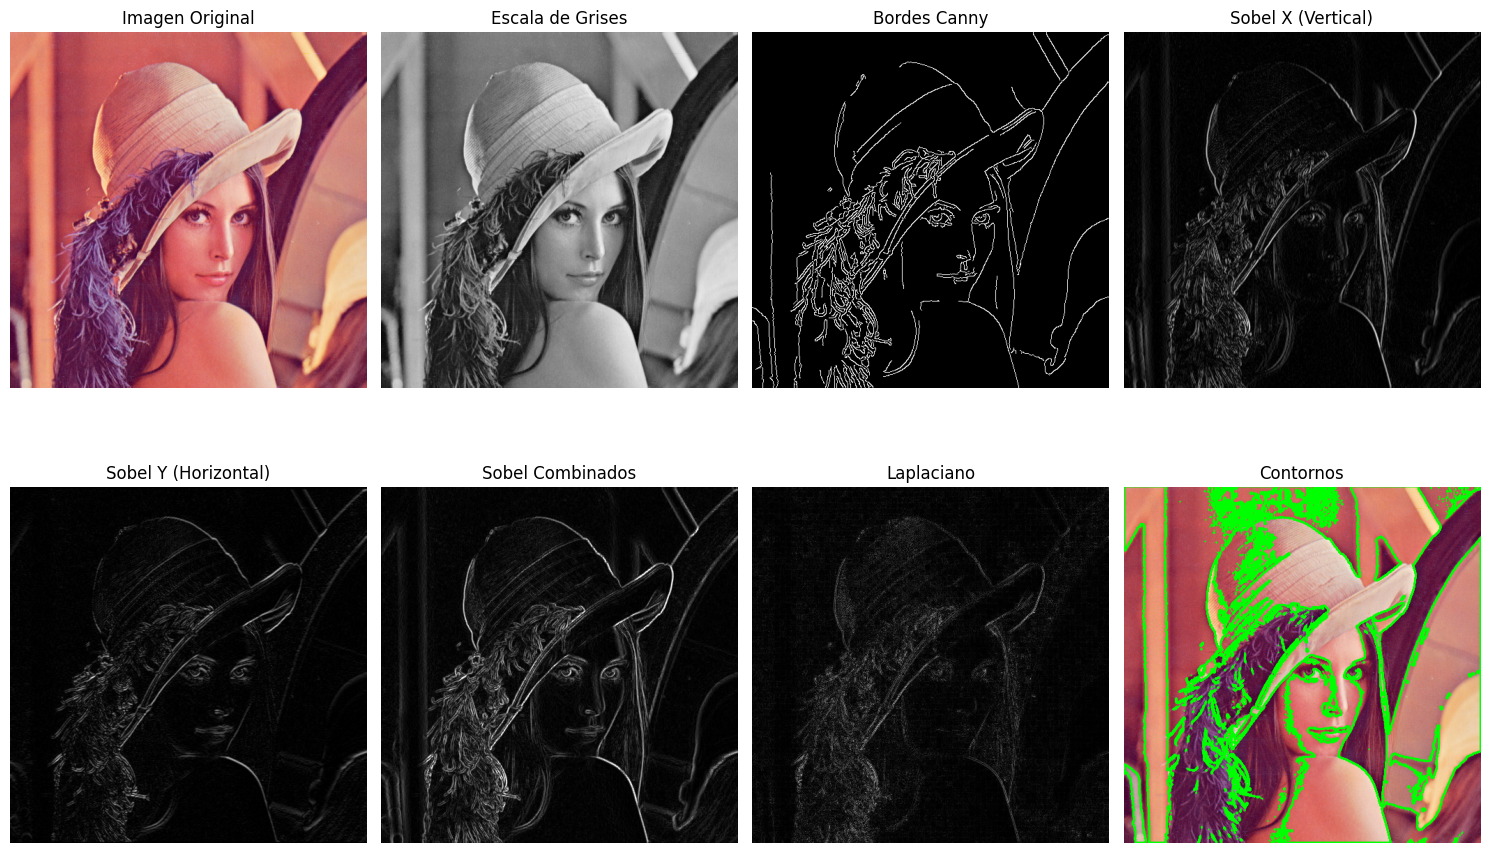

In [11]:
# Visualización de los resultados
plt.figure(figsize=(15, 10)) # Creamos una figura con tamaño específico

# Image original
plt.subplot(2, 4, 1) # Creamos un subplot en la posición 1
plt.title('Imagen Original') # Añadimos un título
plt.imshow(image_rgb) # Mostramos la imagen original
plt.axis('off') # Ocultamos los ejes

# Imagen en escala de grises
plt.subplot(2, 4, 2) # Creamos un subplot en la posición 2
plt.title('Escala de Grises') # Añadimos un título
plt.imshow(gray_image, cmap='gray') # Mostramos la imagen en escala de grises
plt.axis('off') # Ocultamos los ejes

# Bordes Canny
plt.subplot(2, 4, 3) # Creamos un subplot en la posición 3
plt.title('Bordes Canny') # Añadimos un título
plt.imshow(edges_canny, cmap='gray') # Mostramos los bordes detectados con Canny
plt.axis('off') # Ocultamos los ejes

# Bordes Sobel X
plt.subplot(2, 4, 4) # Creamos un subplot en la posición 4
plt.title('Sobel X (Vertical)') # Añadimos un título
plt.imshow(sobelx, cmap='gray') # Mostramos los bordes verticales
plt.axis('off') # Ocultamos los ejes

# Bordes Sobel Y
plt.subplot(2, 4, 5) # Creamos un subplot en la posición 5
plt.title('Sobel Y (Horizontal)') # Añadimos un título
plt.imshow(sobely, cmap='gray') # Mostramos los bordes horizontales
plt.axis('off') # Ocultamos los ejes

# Bordes Sobel Combinados
plt.subplot(2, 4, 6) # Creamos un subplot en la posición 6
plt.title('Sobel Combinados') # Añadimos un título
plt.imshow(sobel_combined, cmap='gray') # Mostramos los bordes combinados
plt.axis('off') # Ocultamos los ejes

# Bordes Laplaciano
plt.subplot(2, 4, 7) # Creamos un subplot en la posición 7
plt.title('Laplaciano') # Añadimos un título
plt.imshow(laplacian , cmap='gray') # Mostramos los bordes detectados con Laplaciano
plt.axis('off') # Ocultamos los ejes

# Contornos
plt.subplot(2, 4, 8) # Creamos un subplot en la posición 8
plt.title('Contornos') # Añadimos un título
plt.imshow(contour_image) # Mostramos los imagen con contornos dibujados
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # Ajustamos el layout para que no se superpongan los títulos
plt.show() # Mostramos la figura completa

In [12]:
# Inforemación sobre los métodos de detección
print("Métodos de detección de bordes:")
print("1. Canny: Algoritmo multi-etapa que detecta bordes fuertes y débiles. Es robusto al ruido.")
print("2. Sobel: Calcula gradientes en direcciones X e Y, detectando cambios de intensidad.")
print("3. Laplaciano: Detecta áreas donde la intensidad cambia rpidamente usando la segunda derivada.")
print("4. Contornos: Dectecta curvas que unen puntos continuos con el mismo color o intensidad.")
print(f"Número de contornos encontrados: {len(contours)}")

Métodos de detección de bordes:
1. Canny: Algoritmo multi-etapa que detecta bordes fuertes y débiles. Es robusto al ruido.
2. Sobel: Calcula gradientes en direcciones X e Y, detectando cambios de intensidad.
3. Laplaciano: Detecta áreas donde la intensidad cambia rpidamente usando la segunda derivada.
4. Contornos: Dectecta curvas que unen puntos continuos con el mismo color o intensidad.
Número de contornos encontrados: 1141
